In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../data/car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.duplicated().sum()

2

In [7]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.567887,0.32,1.20,6.10,9.84,92.6
Kms_Driven,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


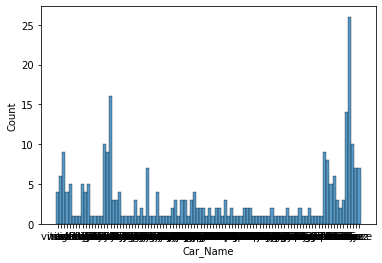

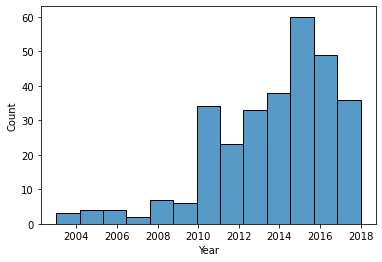

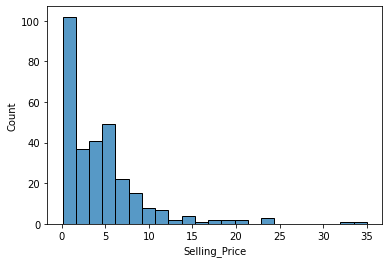

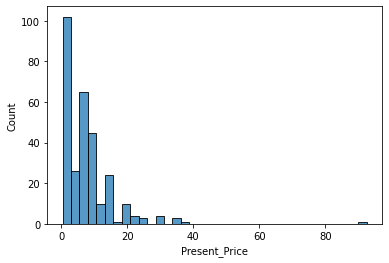

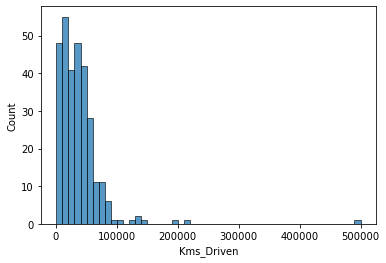

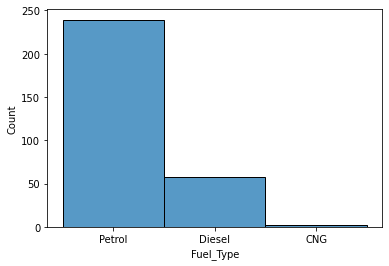

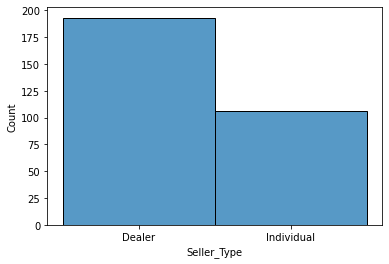

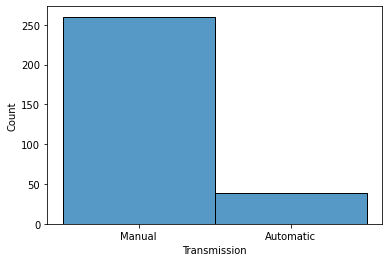

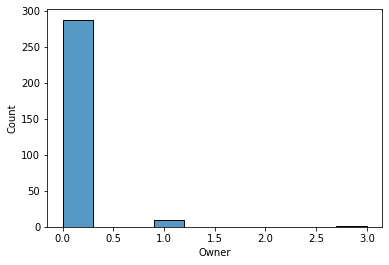

In [10]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

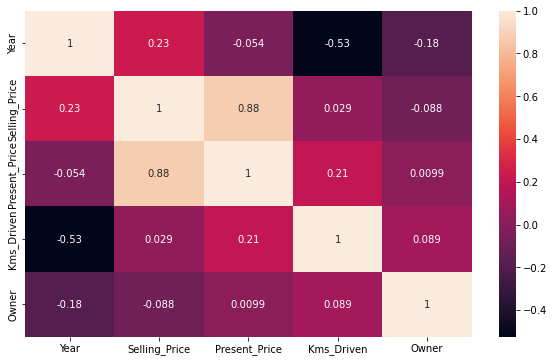

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
df["vehicle_age"]=2021-df.Year

In [14]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [15]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [16]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [17]:
df.Seller_Type.value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

In [18]:
df.Transmission.value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

In [19]:
df = pd.get_dummies(df, drop_first=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [21]:
X = df.drop("Selling_Price", axis=1)
y = df.Selling_Price

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (239, 8)
Train target shape   :  (239,)
Test features shape  :  (60, 8)
Test target shape    :  (60,)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression(n_jobs=-1)

In [25]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [26]:
model.coef_

array([ 4.24853570e-01, -4.81478641e-06,  5.33687461e-01, -3.95416235e-01,
        2.30146603e+00,  4.83432643e-01, -1.12054389e+00, -1.67261900e+00])

In [27]:
print("Model intercept  : ", model.intercept_, "\n")

for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept  :  5.416340531754047 

Present_Price :  0.4248535699519811
Kms_Driven :  -4.814786410267552e-06
Owner :  0.5336874609133275
vehicle_age :  -0.3954162348493528
Fuel_Type_Diesel :  2.301466026583898
Fuel_Type_Petrol :  0.4834326434645737
Seller_Type_Individual :  -1.120543890264906
Transmission_Manual :  -1.672618999948663


In [28]:
coeff_df=pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Present_Price,0.424854
Kms_Driven,-0.000005
Owner,0.533687
vehicle_age,-0.395416
Fuel_Type_Diesel,2.301466
Fuel_Type_Petrol,0.483433
Seller_Type_Individual,-1.120544
Transmission_Manual,-1.672619


In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
y_pred=model.predict(X_test)

In [31]:
y_pred

array([-2.95007526e+00,  1.00997921e+01,  2.29671541e+00,  2.12973947e+00,
        4.26469800e+00,  1.66596864e+01,  4.12610528e+00,  5.78885602e-01,
        1.05228711e+01,  7.24502343e-01,  4.05995252e+00, -5.24347693e-01,
        2.03967486e+01,  2.68294100e+00,  1.57052484e+00,  1.88065032e+00,
        4.26880083e+00,  1.81574855e+01,  6.56621211e+00,  6.23964182e+00,
        7.37077730e+00,  1.47392765e+00,  7.97521520e+00,  3.90066405e+00,
        1.37311624e+00,  6.50182694e+00,  3.38464628e+00,  1.98520739e+01,
        9.74666272e+00,  5.88256176e-03,  9.83274506e+00, -2.43493735e-01,
        2.87370713e+00,  1.96991977e+00,  4.18766542e+00,  6.27346282e+00,
        4.25962321e+00, -1.18518093e+00,  4.48821783e+00,  3.40798044e+00,
        7.14821177e+00,  8.92189235e+00,  1.10759837e+01,  3.29223706e+00,
        4.93060670e+00, -1.08748224e+00,  2.29143814e+00,  8.22826838e+00,
        4.25469409e+00,  7.43851387e+00,  4.29494925e+00,  9.84712369e+00,
        7.51362146e+00,  

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)

In [33]:
print("Model testing performance:")
print("--------------------------")
print('RMSE is {:29}'.format(rmse))
print("MAE is {:30}".format(mae))
print('R2 score is {:26}'.format(R2_score))

Model testing performance:
--------------------------
RMSE is            1.9436610410343111
MAE is             1.3255435126508195
R2 score is          0.869674806383808


/opt/conda/envs/intelml/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


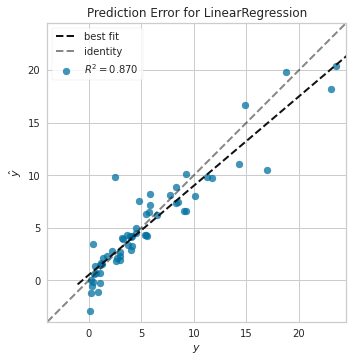

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [34]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm = LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [35]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

result_sample = results.sample(10)
result_sample

,Actual,Predicted
101,1.70,2.291438
289,10.11,7.975215
262,4.00,4.126105
170,0.40,-0.125989
234,5.50,4.254694
50,14.90,16.659686
117,1.10,1.473928
97,17.00,10.522871
125,0.90,-1.087482
49,7.75,8.086851


In [36]:
def show_metrics(y_test, y_pred):
    rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
    mae = mean_absolute_error(y_test,y_pred)
    R2_score = r2_score(y_test,y_pred)
    print("Model testing performance:")
    print("--------------------------")
    print('RMSE is {:29}'.format(rmse))
    print("MAE is {:30}".format(mae))
    print('R2 score is {:26}'.format(R2_score))

In [37]:
from sklearn.linear_model import Ridge, RidgeCV

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
X_test_scaled = scaler.transform(X_test)

In [42]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

In [43]:
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is             2.314807257737037
MAE is              1.422881782678752
R2 score is         0.8151510490934967


In [44]:
ridge_model.alpha

1.0

In [45]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [46]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [47]:
ridgecv.alpha_

0.1

In [48]:
alpha_space = np.linspace(0.01, 10, 100)
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10)

In [49]:
ridgecv.alpha_

0.1109090909090909

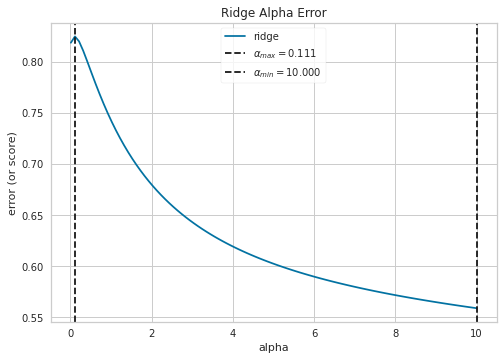

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [50]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 10, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

In [51]:
y_pred=ridgecv.predict(X_test_scaled)

In [52]:
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            1.9677378377246746
MAE is             1.3247546882049375
R2 score is          0.866426042624729


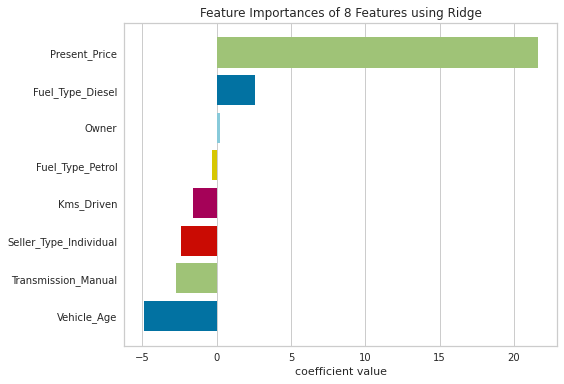

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Ridge'}, xlabel='coefficient value'>

In [53]:
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train_scaled, y_train)
viz.show()

In [54]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [55]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is             5.196707901721543
MAE is              3.454313171036205
R2 score is        0.06836899734675761


In [56]:
alpha_space = np.linspace(0.001, 10, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train_scaled, y_train)

In [57]:
y_pred=lasso_cv_model.predict(X_test_scaled)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            1.9425452076248035
MAE is              1.325118456999874
R2 score is         0.8698243998157378


In [58]:
lasso_cv_model.alpha_

0.001

In [59]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [60]:
def evaluate_model(Model, lambdas):
    training_errors = [] 
    testing_errors = [] 
    for l in lambdas:

        model = Model(alpha=l) 
        model.fit(X_train_scaled, y_train)

        training_predictions = model.predict(X_train_scaled)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test_scaled)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


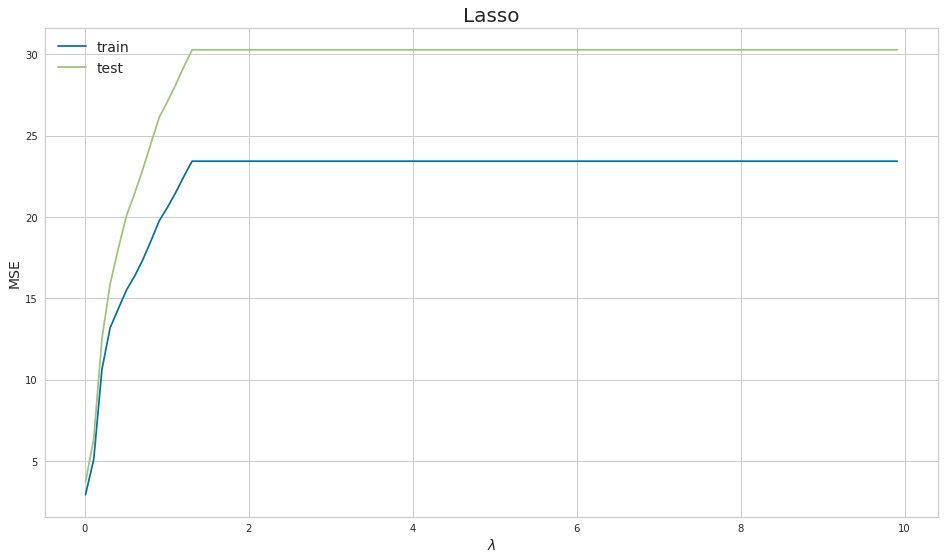

In [61]:
lambdas = np.arange(0.01, 10, step=0.1)
lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

# KNN Regression

In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
knn = KNeighborsRegressor(n_jobs=-1)

In [64]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_jobs=-1)

In [65]:
y_pred = knn.predict(X_test_scaled)

In [66]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            2.0093681262194507
MAE is             1.1932666666666667
R2 score is         0.8607143621734235


In [67]:
rmse_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled, y_train)
    pred=model.predict(X_test_scaled)
    error = np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.3846822740253448
RMSE value for k=  2 is: 1.7258808137682433
RMSE value for k=  3 is: 1.6767373521658504
RMSE value for k=  4 is: 1.7727129338483805
RMSE value for k=  5 is: 2.0093681262194507
RMSE value for k=  6 is: 2.020642568315557
RMSE value for k=  7 is: 2.0627375229135128
RMSE value for k=  8 is: 2.0437723495210194
RMSE value for k=  9 is: 2.124426594144751
RMSE value for k=  10 is: 2.174835645131221
RMSE value for k=  11 is: 2.2285672613963197
RMSE value for k=  12 is: 2.28841210564832
RMSE value for k=  13 is: 2.3683212248474903
RMSE value for k=  14 is: 2.455133903271509
RMSE value for k=  15 is: 2.5594100998588054
RMSE value for k=  16 is: 2.6523791010776216
RMSE value for k=  17 is: 2.6972088813645207
RMSE value for k=  18 is: 2.7558461381656993
RMSE value for k=  19 is: 2.80976797706665
RMSE value for k=  20 is: 2.873796118957177


In [68]:
knn = KNeighborsRegressor(n_jobs=-1, n_neighbors=1)

In [69]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=1)

In [70]:
y_pred = knn.predict(X_test_scaled)

In [71]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            1.3846822740253448
MAE is             0.8511666666666666
R2 score is         0.9338564371500823


# SVM Regressor

In [72]:
from sklearn.svm import SVR

In [73]:
svm = SVR()

In [74]:
svm.fit(X_train_scaled, y_train)

SVR()

In [75]:
y_pred = svm.predict(X_test_scaled)

In [76]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            3.6061005844073257
MAE is             1.9875101493872032
R2 score is         0.5513961546809143


In [77]:
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'degree': [1, 2, 3, 4, 5],
         'gamma': ['scale', 'auto', 3, 4],
         'C': [2.2, 2.5, 3, 3.5],
         'epsilon': [0.1, 0.2, 0.4]}

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
grid_svm = GridSearchCV(SVR(), param_grid=params, n_jobs=-1, cv=10)

In [80]:
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [2.2, 2.5, 3, 3.5], 'degree': [1, 2, 3, 4, 5],
                         'epsilon': [0.1, 0.2, 0.4],
                         'gamma': ['scale', 'auto', 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [81]:
grid_svm.best_params_

{'C': 2.5, 'degree': 3, 'epsilon': 0.1, 'gamma': 3, 'kernel': 'poly'}

In [82]:
grid_svm.best_score_

0.918421002605989

In [83]:
y_pred = grid_svm.predict(X_test_scaled)

In [84]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            1.9320993898957144
MAE is             0.8583981665997847
R2 score is           0.87122064483152


In [85]:
cvresults = pd.DataFrame(grid_svm.cv_results_)

In [86]:
cvresults.iloc[grid_svm.best_index_]

mean_fit_time                                                 0.065739
std_fit_time                                                  0.026301
mean_score_time                                               0.000978
std_score_time                                                0.000154
param_C                                                            2.5
param_degree                                                         3
param_epsilon                                                      0.1
param_gamma                                                          3
param_kernel                                                      poly
params               {'C': 2.5, 'degree': 3, 'epsilon': 0.1, 'gamma...
split0_test_score                                             0.935681
split1_test_score                                             0.820895
split2_test_score                                             0.931837
split3_test_score                                             0.952915
split4

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
dt = DecisionTreeRegressor()

In [89]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
y_pred = dt.predict(X_test)

In [91]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is             2.075887360463793
MAE is             0.9384999999999999
R2 score is         0.8513397398039958


In [92]:
from sklearn.model_selection import cross_val_score, cross_validate

In [93]:
dt = DecisionTreeRegressor(random_state=42)
scores = cross_validate(dt, X_train, y_train, cv=10, n_jobs=-1)

In [94]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.003249,0.001386,0.903703
1,0.003071,0.001305,0.849986
2,0.003056,0.001404,0.922718
3,0.004644,0.002308,0.812128
4,0.003211,0.001363,0.826649
5,0.003417,0.001385,0.780828
6,0.003215,0.001301,0.869013
7,0.004489,0.001975,0.991297
8,0.003040,0.001350,0.946646
9,0.003183,0.001377,0.945795


In [95]:
pd.DataFrame(scores)['test_score'].mean()

0.8848763044944963

In [96]:
param_grid = {"splitter":["best", "random"],
              "max_depth": [None, 4, 5, 6, 7 ,8 ,9 ,10, 15, 20],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 10],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9, 12, 15]}

In [97]:
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=param_grid, n_jobs=-1, cv=10)

In [98]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 10],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9, 12, 15],
                         'splitter': ['best', 'random']})

In [99]:
grid_dt.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [100]:
grid_dt.best_score_

0.8947425055441833

In [101]:
y_pred = grid_dt.predict(X_test)

In [102]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            2.2087744133316836
MAE is              1.075789710664087
R2 score is         0.8316977023796659


# Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rf = RandomForestRegressor(random_state=42)

In [105]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [106]:
y_pred = rf.predict(X_test)

In [107]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            1.7787959586473092
MAE is             0.8508350000000002
R2 score is         0.8908460170178866


In [108]:
scores = cross_validate(RandomForestRegressor(random_state=42), X_train, y_train, cv=10, n_jobs=-1)

In [109]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.118230,0.008021,0.933630
1,0.117699,0.007754,0.980922
2,0.117056,0.008057,0.874003
3,0.117363,0.007908,0.826043
4,0.116360,0.007746,0.857104
5,0.117716,0.007923,0.908533
6,0.119164,0.007931,0.929759
7,0.118069,0.008045,0.890375
8,0.116901,0.007714,0.973026
9,0.117686,0.007916,0.946911


In [110]:
pd.DataFrame(scores)['test_score'].mean()

0.9120306327014779

In [111]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)

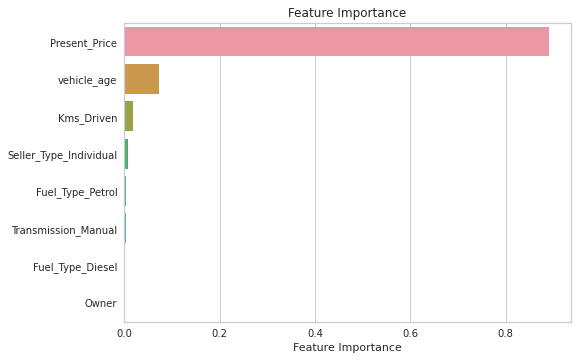

In [112]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [113]:
param_grid = {"n_estimators":[100,300,500, 700, 900],
             "max_depth":[3,5,7, 9, 11, 13, 15, 17, 21],
             "min_samples_split":[2,4,6]}

In [114]:
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=10, n_jobs=-1)

In [115]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 21],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 300, 500, 700, 900]})

In [116]:
rf_grid.best_score_

0.915723527340177

In [117]:
rf_grid.best_params_

{'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 500}

In [118]:
cvscores = pd.DataFrame(rf_grid.cv_results_)

In [119]:
cvscores.iloc[rf_grid.best_index_]

mean_fit_time                                                       0.973101
std_fit_time                                                        0.014572
mean_score_time                                                      0.06119
std_score_time                                                      0.001632
param_max_depth                                                           11
param_min_samples_split                                                    2
param_n_estimators                                                       500
params                     {'max_depth': 11, 'min_samples_split': 2, 'n_e...
split0_test_score                                                   0.934558
split1_test_score                                                   0.982244
split2_test_score                                                   0.876512
split3_test_score                                                   0.865094
split4_test_score                                                    0.85613

# AdaBoost, GradientBoost, XGBoost Regressor

In [120]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [121]:
from xgboost import XGBRegressor

In [122]:
model = AdaBoostRegressor(random_state=101)

In [123]:
model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

In [124]:
y_pred = model.predict(X_test)

In [125]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            1.9079241436514156
MAE is             0.9750849721227819
R2 score is          0.874423166757099


In [126]:
model.score(X_train, y_train)

0.9729587038001736

In [127]:
model = AdaBoostRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, cv =10)

In [128]:
pd.DataFrame(scores)['test_score'].mean()

0.8244179227605652

In [129]:
param_grid = {"n_estimators":[10, 30, 50, 100, 200, 300, 400, 500, 600],
              "learning_rate":[0.1, 0.5, 0.8, 1, 1.5, 2, 2.5, 3, 3.5]}

In [130]:
grid_ada = GridSearchCV(AdaBoostRegressor(random_state=42),param_grid=param_grid, cv=10, n_jobs=-1)

In [131]:
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.8, 1, 1.5, 2, 2.5, 3,
                                           3.5],
                         'n_estimators': [10, 30, 50, 100, 200, 300, 400, 500,
                                          600]})

In [132]:
grid_ada.best_score_

0.8336474223974705

In [133]:
grid_ada.best_params_

{'learning_rate': 2, 'n_estimators': 50}

In [134]:
model = GradientBoostingRegressor(random_state=101)

In [135]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [136]:
y_pred = model.predict(X_test)

In [137]:
model.score(X_train, y_train)

0.9964886722758032

In [138]:
model.score(X_test, y_test)

0.9327029333700011

In [139]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            1.3967040984294812
MAE is             0.7105904042714664
R2 score is         0.9327029333700011


In [140]:
param_grid = {"n_estimators":[100, 200, 300], "subsample":[0.5, 0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.001, 0.01, 0.1, 0.5, 0.7, 1, 1.2], 'max_depth':[2,3,4,5]}

In [141]:
model = GradientBoostingRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          n_jobs = -1)

In [142]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.7, 1, 1.2],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.8, 1]})

In [143]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': None,
 'n_estimators': 100,
 'subsample': 0.5}

In [144]:
grid_model.best_score_

0.9388448998769976

In [145]:
model = XGBRegressor(random_state=101)

In [146]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=64,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
model.score(X_train, y_train)

0.9999939549267836

In [149]:
model.score(X_test, y_test)

0.9022317808226649

In [150]:
param_grid = {"n_estimators":[100, 300, 500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [151]:
model = XGBRegressor(random_state=101, silent=True)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train, y_train)